Optimal path from start to goal: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (2, 6), (3, 6), (3, 7), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]


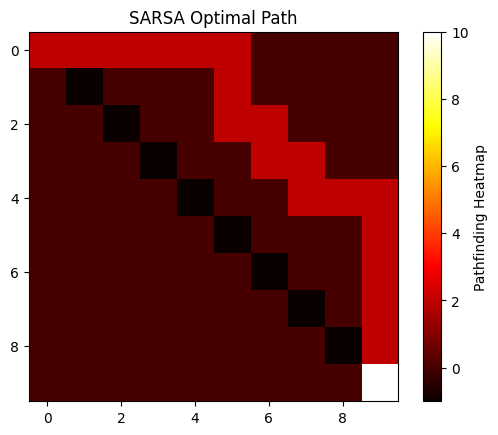

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the environment
grid_size = 10
goal_position = (9, 9)
start_position = (0, 0)
obstacles = [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8)]

# SARSA parameters
alpha = 0.1       # Learning rate
gamma = 0.9       # Discount factor
epsilon = 0.1     # Exploration rate
num_episodes = 500

# Q-table initialization
Q_table = np.zeros((grid_size, grid_size, 4))  # 4 possible actions: up, down, left, right

# Define actions
actions = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}

# Function to take a step in the grid
def step(state, action):
    row, col = state
    move = actions[action]
    next_state = (max(0, min(row + move[0], grid_size - 1)),
                  max(0, min(col + move[1], grid_size - 1)))
    
    # Check if next state is an obstacle
    if next_state in obstacles:
        return state, -1  # penalty for hitting an obstacle
    elif next_state == goal_position:
        return next_state, 10  # reward for reaching goal
    else:
        return next_state, -0.1  # small penalty for each step

# Training using SARSA
for episode in range(num_episodes):
    state = start_position
    # Choose action from state using epsilon-greedy strategy
    if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # explore
    else:
        action = np.argmax(Q_table[state[0], state[1]])  # exploit
    
    done = False

    while not done:
        # Take action and observe result
        next_state, reward = step(state, action)
        
        # Choose next action for next state using epsilon-greedy
        if random.uniform(0, 1) < epsilon:
            next_action = random.randint(0, 3)  # explore
        else:
            next_action = np.argmax(Q_table[next_state[0], next_state[1]])  # exploit

        # Update Q-value using SARSA formula
        Q_table[state[0], state[1], action] = Q_table[state[0], state[1], action] + \
            alpha * (reward + gamma * Q_table[next_state[0], next_state[1], next_action] - 
                     Q_table[state[0], state[1], action])

        state = next_state
        action = next_action  # Move to the next action

        # Check if goal is reached
        if state == goal_position:
            done = True

# Display optimal path after training
state = start_position
optimal_path = [state]

while state != goal_position:
    action = np.argmax(Q_table[state[0], state[1]])
    state, _ = step(state, action)
    optimal_path.append(state)

print("Optimal path from start to goal:", optimal_path)

# Visualize the path
grid = np.zeros((grid_size, grid_size))
for (r, c) in obstacles:
    grid[r, c] = -1
for (r, c) in optimal_path:
    grid[r, c] = 2
grid[goal_position] = 10

plt.imshow(grid, cmap="hot", interpolation="nearest")
plt.colorbar(label="Pathfinding Heatmap")
plt.title("SARSA Optimal Path")
plt.show()
